<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">


# Logistic Regression Practice


## Introduction
- Data about the Kickstarter Projects
- **Goal**: Predict whether a project will be funded (check 'state' = 'successful')

#### Read the data into Pandas

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

projects = pd.read_csv('../assets/data/ks-projects-201801.csv')
projects.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


#### 1: What is the distribution of our target?

In [4]:
projects['state'].value_counts()


failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

#### 2: Choose the features to use in the model

Hint: try to visualise the data to understand what features could be more meaningful

In [18]:
# assigning a column
projects['threshold'] = np.where(projects['state']=="successful", 1, 0)
projects.head()
cur_list=projects['currency'].tolist()
cur_list.drop_duplicates()

AttributeError: 'list' object has no attribute 'drop_duplicates'

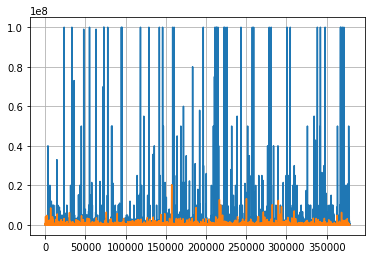

In [29]:
plt.plot(projects['goal'],label='goal')
plt.plot(projects['pledged'],label='pledged')

plt.grid()
plt.show()

successful_projects=projects[projects['state']=='successful'].copy()
unsuccessful_projects=projects[projects['state']!='successful'].copy()


In [30]:
successful_projects=projects[projects['state']=='successful'].copy()
unsuccessful_projects=projects[projects['state']!='successful'].copy()

In [31]:
print(successful_projects.shape)
print(unsuccessful_projects.shape)

(133956, 16)
(244705, 16)


Text(0,0.5,'goal')

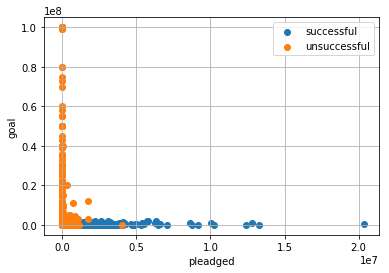

In [36]:
plt.scatter(successful_projects['pledged'],successful_projects['goal'],label='successful')
plt.scatter(unsuccessful_projects['pledged'],unsuccessful_projects['goal'],label='unsuccessful')
plt.legend()
plt.grid()
plt.xlabel("pleadged")
plt.ylabel("goal")

In [12]:

#pleadged/goal >1 therefore we got more money thn we were asking for
#making graphs to explore relationships

#threshold_bin=pd.crosstab(projects['threshold'],projects[''])
#bins=[0,1000,3000,42000]
#group=['Low','Average','High']

#projects['threshold']=projects.cut(df['currency'],bins,labels=group)
#Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
#Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
#plt.xlabel('CoapplicantIncome')
#P = plt.ylabel('Percentage')

NameError: name 'df' is not defined

#### 3: Do a train-test split

#### 4: Fit a logistic regression model on your training set

#### 5: What is the interpretation of the coefficients?

If you used a categorical feature, calculate the log odds for the baseline, and the log odds for one of its other values.

What is the difference in log odds, and therefore the difference in probability?

#### EXTRA: predict whether a project will fail ('state' = 'failed')